In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


In [58]:
df_train = pd.read_csv('../input/digit-recognizer/train.csv')
df_test = pd.read_csv('../input/digit-recognizer/test.csv')



In [59]:
df_features = df_train.iloc[:, 1:785]
df_label = df_train.iloc[:, 0]

X_test = df_test.iloc[:, 0:784]

print(X_test.shape)

(28000, 784)


In [60]:


from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(df_features, df_label, 
                                                test_size = 0.2,
                                                random_state = 1212)

X_train = X_train.as_matrix().reshape(33600, 784) #(33600, 784)
X_cv = X_cv.as_matrix().reshape(8400, 784) #(8400, 784)

X_test = X_test.as_matrix().reshape(28000, 784)



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [61]:

print((min(X_train[1]), max(X_train[1])))


(0, 255)


In [62]:
X_train = X_train.astype('float32'); X_cv= X_cv.astype('float32'); X_test = X_test.astype('float32')
X_train /= 255; X_cv /= 255; X_test /= 255

# Convert labels to One Hot Encoded
num_digits = 10
y_train = keras.utils.to_categorical(y_train, num_digits)
y_cv = keras.utils.to_categorical(y_cv, num_digits)

In [63]:
print(y_train.shape)
print(y_train[3])

(33600, 10)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [64]:
# Input Parameters
n_input = 784 # number of features
n_hidden_1 = 300
n_hidden_2 = 100
n_hidden_3 = 100
n_hidden_4 = 200
num_digits = 10

In [65]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

In [66]:
model1 = Model(Inp, output)
model1.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 784)               0         
_________________________________________________________________
Hidden_Layer_1 (Dense)       (None, 300)               235500    
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


In [67]:
learning_rate = 0.1
training_epochs = 25
batch_size = 100
sgd = optimizers.SGD(lr=learning_rate)

In [68]:
model1.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [69]:
Inp = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp)
output = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

model1 = Model(Inp, output)
model1.summary()

model1.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history1 = model1.fit(X_train, y_train,
                     batch_size = batch_size,
                     epochs = training_epochs,
                     verbose = 2,
                     validation_data=(X_cv, y_cv))

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 784)               0         
_________________________________________________________________
Hidden_Layer_1 (Dense)       (None, 300)               235500    
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
Train on 33600 samples, validate on 8400 samples
Epoch 1/40
 - 2s - loss: 1.2991 - accuracy: 0.6856 - val_loss: 0.7554 - val_accuracy: 0.8423
Epoch 2/40
 - 2s - loss: 0.6235 - accuracy: 0.8532 - val_loss: 0.5204 - val_accuracy: 0.8761
Epoch 3/40
 - 2s - loss: 0.4830 - accuracy: 0.8759 - val_loss: 0.4356 - val_accuracy: 0.8907
Epoch 4/40
 - 2s - loss: 0.4208 - accuracy: 0.8890 - v

In [70]:
Inp2 = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp2)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
output2 = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

model2 = Model(Inp2,output2)
model2.summary()

model2.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 784)               0         
_________________________________________________________________
Hidden_Layer_1 (Dense)       (None, 300)               235500    
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 100)               30100     
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [71]:
history2 = model2.fit(X_train, y_train,
                     batch_size = batch_size,
                     epochs = training_epochs,
                     verbose = 2,
                     validation_data=(X_cv, y_cv))

Train on 33600 samples, validate on 8400 samples
Epoch 1/40
 - 2s - loss: 1.3568 - accuracy: 0.6550 - val_loss: 0.7279 - val_accuracy: 0.8367
Epoch 2/40
 - 2s - loss: 0.5704 - accuracy: 0.8582 - val_loss: 0.4614 - val_accuracy: 0.8811
Epoch 3/40
 - 2s - loss: 0.4228 - accuracy: 0.8870 - val_loss: 0.3814 - val_accuracy: 0.8970
Epoch 4/40
 - 2s - loss: 0.3639 - accuracy: 0.8998 - val_loss: 0.3407 - val_accuracy: 0.9067
Epoch 5/40
 - 2s - loss: 0.3297 - accuracy: 0.9086 - val_loss: 0.3161 - val_accuracy: 0.9108
Epoch 6/40
 - 2s - loss: 0.3062 - accuracy: 0.9138 - val_loss: 0.3004 - val_accuracy: 0.9148
Epoch 7/40
 - 2s - loss: 0.2879 - accuracy: 0.9194 - val_loss: 0.2869 - val_accuracy: 0.9195
Epoch 8/40
 - 2s - loss: 0.2728 - accuracy: 0.9236 - val_loss: 0.2739 - val_accuracy: 0.9233
Epoch 9/40
 - 2s - loss: 0.2602 - accuracy: 0.9263 - val_loss: 0.2615 - val_accuracy: 0.9276
Epoch 10/40
 - 2s - loss: 0.2484 - accuracy: 0.9301 - val_loss: 0.2511 - val_accuracy: 0.9292
Epoch 11/40
 - 2s - 

In [72]:
Inp3 = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp3)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
output3 = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

model3 = Model(Inp3,output3)
model3.summary()

model3.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history3 = model3.fit(X_train, y_train,
                     batch_size = batch_size,
                     epochs = training_epochs,
                     verbose = 2,
                     validation_data=(X_cv, y_cv))

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        (None, 784)               0         
_________________________________________________________________
Hidden_Layer_1 (Dense)       (None, 300)               235500    
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 100)               30100     
_________________________________________________________________
Hidden_Layer_3 (Dense)       (None, 100)               10100     
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                1010      
Total params: 276,710
Trainable params: 276,710
Non-trainable params: 0
_________________________________________________________________
Train on 33600 samples, validate on 8400 samples
Epoch 1/40
 - 2s - loss: 1.4884 - accuracy: 0.6110 - val_loss: 0.7289

In [73]:
Inp4 = Input(shape=(784,))
x = Dense(n_hidden_1, activation='relu', name = "Hidden_Layer_1")(Inp4)
x = Dense(n_hidden_2, activation='relu', name = "Hidden_Layer_2")(x)
x = Dense(n_hidden_3, activation='relu', name = "Hidden_Layer_3")(x)
x = Dense(n_hidden_4, activation='relu', name = "Hidden_Layer_4")(x)
output4 = Dense(num_digits, activation='softmax', name = "Output_Layer")(x)

model4 = Model(Inp4,output4)
model4.summary()

model4.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history4 = model4.fit(X_train, y_train,
                     batch_size = batch_size,
                     epochs = training_epochs,
                     verbose = 2,
                     validation_data=(X_cv, y_cv))

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        (None, 784)               0         
_________________________________________________________________
Hidden_Layer_1 (Dense)       (None, 300)               235500    
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 100)               30100     
_________________________________________________________________
Hidden_Layer_3 (Dense)       (None, 100)               10100     
_________________________________________________________________
Hidden_Layer_4 (Dense)       (None, 200)               20200     
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                2010      
Total params: 297,910
Trainable params: 297,910
Non-trainable params: 0
____________________________________________________

Text(0.5, 0, 'no. of epoch')

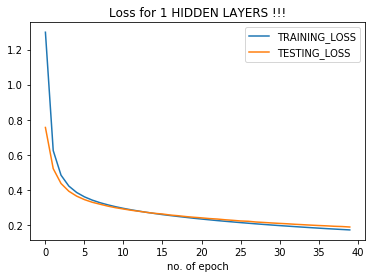

In [74]:
import matplotlib.pyplot as plt

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.legend(['TRAINING_LOSS', 'TESTING_LOSS'])
plt.title('Loss for 1 HIDDEN LAYERS !!!')
plt.xlabel('no. of epoch')


Text(0.5, 0, 'no. of epoch')

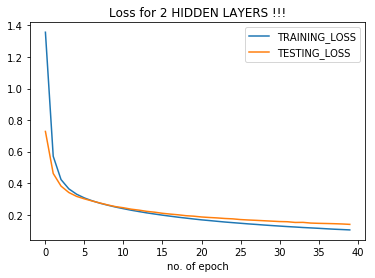

In [75]:
import matplotlib.pyplot as plt

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.legend(['TRAINING_LOSS', 'TESTING_LOSS'])
plt.title('Loss for 2 HIDDEN LAYERS !!!')
plt.xlabel('no. of epoch')


Text(0.5, 0, 'no. of epoch')

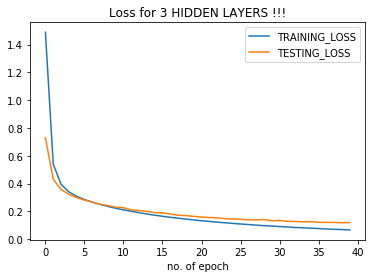

In [76]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.legend(['TRAINING_LOSS', 'TESTING_LOSS'])
plt.title('Loss for 3 HIDDEN LAYERS !!!')
plt.xlabel('no. of epoch')

Text(0.5, 0, 'no. of epoch')

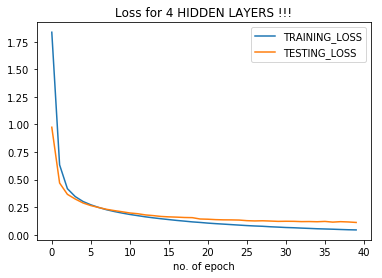

In [77]:
import matplotlib.pyplot as plt
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.legend(['TRAINING_LOSS', 'TESTING_LOSS'])
plt.title('Loss for 4 HIDDEN LAYERS !!!')
plt.xlabel('no. of epoch')

Text(0.5, 0, 'no. of epoch')

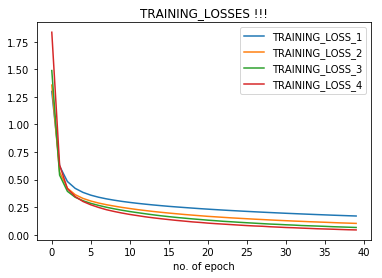

In [78]:
################
#PLOTTING THE TRAINING_LOSSES
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])
plt.plot(history4.history['loss'])

plt.legend(['TRAINING_LOSS_1', 'TRAINING_LOSS_2','TRAINING_LOSS_3','TRAINING_LOSS_4'])
plt.title('TRAINING_LOSSES !!!')
plt.xlabel('no. of epoch')


Text(0.5, 0, 'no. of epoch')

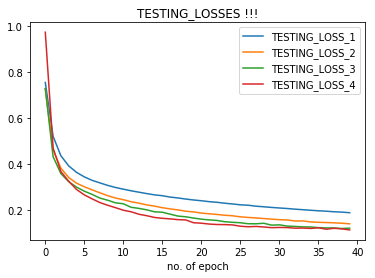

In [79]:
################
#PLOTTING THE TRAINING_LOSSES
plt.plot(history1.history['val_loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history3.history['val_loss'])
plt.plot(history4.history['val_loss'])

plt.legend(['TESTING_LOSS_1', 'TESTING_LOSS_2','TESTING_LOSS_3','TESTING_LOSS_4'])
plt.title('TESTING_LOSSES !!!')
plt.xlabel('no. of epoch')
